# Tensor Flow - Deep Learning - Exercises

Data Set:

https://www.kaggle.com/datasets/vedavyasv/usa-housing

Recommended to use Google Colab Environment but not required

<a name="kaggle"></a>
##### **Kaggle and Colab Integration**


Step One: Kaggle Steps
In your Kaggle Account, Go to your account and Create A New API Key

Step Two: Google Colab Steps
```
# Kaggle on Colab setup

!pip install -q kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

# open the json file you downloaded and paste the string on this line
api_token = {"username":"username","key":"key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json
```

#### Download the dataset
```
!kaggle datasets download -d tongpython/cat-and-dog
!kaggle datasets download -d gpiosenka/sports-classification
```

If you're still having trouble check out this link:

https://stackoverflow.com/questions/56816537/cant-find-kaggle-json-file-in-google-colab

In [ ]:
# Import necessary libraries

from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# TensorFlow
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop

# SKLearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error




# Type your code above this line

In [ ]:
zip_file = ZipFile('USAHousing.zip')
zip_file.extractall()
zip_file.close()

In [ ]:
# Create a Tensor with 1 single value - t1

t1 = tf.constant(10)


# Type your code above this line

In [ ]:
# What is it's shape?

t1

# Type your code above this line

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [ ]:
# Create a Tensor array with 2 values - t2

t2 = tf.constant([20,30])


# Type your code above this line

In [ ]:
# What is the tensor array's shape?


t2

# Type your code above this line

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([20, 30], dtype=int32)>

In [ ]:
# Create a 2 - Dimensional Tensor with 3 values per array - t3

t3 = tf.constant(
    [
     [20,30],
     [40,50]
    ]
)


# Type your code above this line

In [ ]:
# What is the tensor array's shape?

t3

# Type your code above this line

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 30],
       [40, 50]], dtype=int32)>

In [ ]:
# Create a 6x8 tensor with random values. t4

t4 = tf.random.uniform([6,8])



# Type your code above this line

In [ ]:
# What is the tensor's shape and data type?

t4

# Type your code above this line

<tf.Tensor: shape=(6, 8), dtype=float32, numpy=
array([[0.9688153 , 0.7047305 , 0.9127953 , 0.18995011, 0.3098861 ,
        0.62027955, 0.38238394, 0.25054944],
       [0.5420226 , 0.9841132 , 0.33128834, 0.0088917 , 0.87847364,
        0.03390002, 0.14027417, 0.48625064],
       [0.688532  , 0.03620124, 0.7602966 , 0.56027246, 0.9192786 ,
        0.60873115, 0.89789855, 0.8149506 ],
       [0.81956136, 0.44768763, 0.21652114, 0.14595819, 0.05646145,
        0.70918787, 0.69371545, 0.86954045],
       [0.7608372 , 0.98192   , 0.77339864, 0.4178245 , 0.07284021,
        0.2766657 , 0.9172869 , 0.965469  ],
       [0.02379572, 0.9374547 , 0.71716607, 0.843243  , 0.10354722,
        0.3388201 , 0.80531454, 0.68444717]], dtype=float32)>

In [ ]:
# Reshape t4 to be a 3x4x4


t5 = tf.reshape(t4, [3,4,4])
t5


# Type your code above this line

<tf.Tensor: shape=(3, 4, 4), dtype=float32, numpy=
array([[[0.9688153 , 0.7047305 , 0.9127953 , 0.18995011],
        [0.3098861 , 0.62027955, 0.38238394, 0.25054944],
        [0.5420226 , 0.9841132 , 0.33128834, 0.0088917 ],
        [0.87847364, 0.03390002, 0.14027417, 0.48625064]],

       [[0.688532  , 0.03620124, 0.7602966 , 0.56027246],
        [0.9192786 , 0.60873115, 0.89789855, 0.8149506 ],
        [0.81956136, 0.44768763, 0.21652114, 0.14595819],
        [0.05646145, 0.70918787, 0.69371545, 0.86954045]],

       [[0.7608372 , 0.98192   , 0.77339864, 0.4178245 ],
        [0.07284021, 0.2766657 , 0.9172869 , 0.965469  ],
        [0.02379572, 0.9374547 , 0.71716607, 0.843243  ],
        [0.10354722, 0.3388201 , 0.80531454, 0.68444717]]], dtype=float32)>

In [ ]:
# What is the shape of the reshaped Tensor t4?

t5.shape

# Type your code above this line

TensorShape([3, 4, 4])

In [ ]:
# Get the 2nd and 3rd values from the 2nd and 3rd row from the 1st and 2nd group


t5[:2,1:3,1:3]

# Type your code above this line

<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[0.62027955, 0.38238394],
        [0.9841132 , 0.33128834]],

       [[0.60873115, 0.89789855],
        [0.44768763, 0.21652114]]], dtype=float32)>

In [ ]:
# Expand the dimensions of the tensor (add a dimension on the 0 axis)

tf.expand_dims(t5, axis=0)


# Type your code above this line

<tf.Tensor: shape=(1, 3, 4, 4), dtype=float32, numpy=
array([[[[0.9688153 , 0.7047305 , 0.9127953 , 0.18995011],
         [0.3098861 , 0.62027955, 0.38238394, 0.25054944],
         [0.5420226 , 0.9841132 , 0.33128834, 0.0088917 ],
         [0.87847364, 0.03390002, 0.14027417, 0.48625064]],

        [[0.688532  , 0.03620124, 0.7602966 , 0.56027246],
         [0.9192786 , 0.60873115, 0.89789855, 0.8149506 ],
         [0.81956136, 0.44768763, 0.21652114, 0.14595819],
         [0.05646145, 0.70918787, 0.69371545, 0.86954045]],

        [[0.7608372 , 0.98192   , 0.77339864, 0.4178245 ],
         [0.07284021, 0.2766657 , 0.9172869 , 0.965469  ],
         [0.02379572, 0.9374547 , 0.71716607, 0.843243  ],
         [0.10354722, 0.3388201 , 0.80531454, 0.68444717]]]],
      dtype=float32)>

### Read in the Data into a DataFrame

In [ ]:
df = pd.read_csv('USA_Housing.csv')

In [ ]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


### Train Test Split and Scale the Data

In [ ]:
X = df[df.columns[:-2]].values

y = df['Price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build our first Model - model_1

Single Layer

Number of units equals the number of features

Use 'tanh' for activation

Use the Adam Optimizer

Train for 25 Epochs

In [ ]:
model_1 = Sequential()


model_1.add(Dense(5, activation='tanh'))

# Output Layer
model_1.add(Dense(1, activation='tanh'))


# Compile Layer
model_1.compile(
    optimizer=Adam(),
    loss='mae'
)

# Fit Layer
history_1 = model_1.fit(X_train,
                        y_train,
                        validation_data=(X_test, y_test),
                        epochs=25)

Epoch 1/25
110/110 [==============================] - 2s 6ms/step - loss: 1230879.7500 - val_loss: 1234854.5000
Epoch 2/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.5000 - val_loss: 1234854.2500
Epoch 3/25
110/110 [==============================] - 0s 3ms/step - loss: 1230879.1250 - val_loss: 1234854.2500
Epoch 4/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.2500 - val_loss: 1234854.2500
Epoch 5/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 1234854.2500
Epoch 6/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 1234854.2500
Epoch 7/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 1234854.2500
Epoch 8/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 1234854.2500
Epoch 9/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 12348

In [ ]:
print(5 * (5 + 1))

30


### What does Our Model Look like?

Model Summary

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


### Evaluate the Model with Plots

It's probably a good idea to create a function to plot all the things we want on separate graphs otherwise the data is going to be hard to read

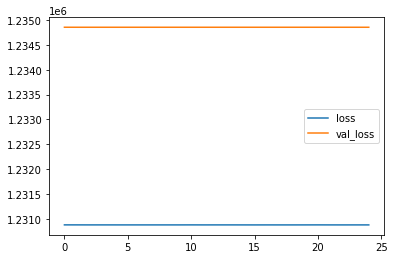

In [ ]:
pd.DataFrame(history_1.history).plot()

### 2nd Model - Add a Hidden Layer

Copy of Model 1

Add another Hidden Layer

All other parameters remain the same


In [ ]:
model_2 = Sequential()

model_2.add(Dense(5, activation='tanh'))
model_2.add(Dense(5, activation='tanh'))

model_2.add(Dense(1, activation='tanh'))

model_2.compile(
    optimizer=Adam(),
    loss='mae'
)

history_2 = model_2.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=25
)

Epoch 1/25
110/110 [==============================] - 1s 5ms/step - loss: 1230879.7500 - val_loss: 1234854.6250
Epoch 2/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.2500 - val_loss: 1234854.3750
Epoch 3/25
110/110 [==============================] - 1s 5ms/step - loss: 1230879.1250 - val_loss: 1234854.2500
Epoch 4/25
110/110 [==============================] - 1s 5ms/step - loss: 1230878.8750 - val_loss: 1234854.2500
Epoch 5/25
110/110 [==============================] - 1s 5ms/step - loss: 1230879.6250 - val_loss: 1234854.2500
Epoch 6/25
110/110 [==============================] - 1s 5ms/step - loss: 1230879.0000 - val_loss: 1234854.2500
Epoch 7/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.0000 - val_loss: 1234854.2500
Epoch 8/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.5000 - val_loss: 1234854.2500
Epoch 9/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 12348

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


### 3rd Model - Add Units to the layer

Copy of Model 1

Add units to the  Layer (128)

All other parameters remain the same

In [ ]:
model_3 = Sequential()

model_3.add(Dense(128, activation='tanh'))

model_3.compile(
    optimizer=Adam(),
    loss='mae'
)

history_3 = model_3.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=25
)

Epoch 1/25
110/110 [==============================] - 2s 8ms/step - loss: 1230880.0000 - val_loss: 1234854.7500
Epoch 2/25
110/110 [==============================] - 1s 6ms/step - loss: 1230879.5000 - val_loss: 1234854.6250
Epoch 3/25
110/110 [==============================] - 1s 7ms/step - loss: 1230879.5000 - val_loss: 1234854.6250
Epoch 4/25
110/110 [==============================] - 1s 6ms/step - loss: 1230879.2500 - val_loss: 1234854.5000
Epoch 5/25
110/110 [==============================] - 1s 5ms/step - loss: 1230879.0000 - val_loss: 1234854.5000
Epoch 6/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 1234854.3750
Epoch 7/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 1234854.3750
Epoch 8/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 1234854.2500
Epoch 9/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.2500 - val_loss: 12348

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               768       
                                                                 
Total params: 768
Trainable params: 768
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(128 * (5 + 1))

768


### 4th Model - Change the Activation algorithm

Copy of Model 1

Change the activation to 'relu'

All other parameters remain the same

In [ ]:
model_4 = Sequential()

model_4.add(Dense(5, activation='relu'))

model_4.compile(
    optimizer=Adam(),
    loss='mae'
)

history_4 = model_4.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=25
)

Epoch 1/25
110/110 [==============================] - 1s 5ms/step - loss: 1230880.0000 - val_loss: 1234854.7500
Epoch 2/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.2500 - val_loss: 1234854.3750
Epoch 3/25
110/110 [==============================] - 0s 4ms/step - loss: 1230878.7500 - val_loss: 1234853.8750
Epoch 4/25
110/110 [==============================] - 0s 3ms/step - loss: 1230878.3750 - val_loss: 1234853.5000
Epoch 5/25
110/110 [==============================] - 0s 4ms/step - loss: 1230878.0000 - val_loss: 1234853.2500
Epoch 6/25
110/110 [==============================] - 0s 4ms/step - loss: 1230877.7500 - val_loss: 1234852.6250
Epoch 7/25
110/110 [==============================] - 0s 4ms/step - loss: 1230877.1250 - val_loss: 1234852.1250
Epoch 8/25
110/110 [==============================] - 0s 4ms/step - loss: 1230877.1250 - val_loss: 1234851.6250
Epoch 9/25
110/110 [==============================] - 0s 4ms/step - loss: 1230876.5000 - val_loss: 12348

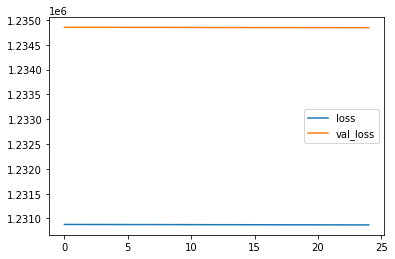

In [ ]:
pd.DataFrame(history_4.history).plot()

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


### 5th Model - Change the Learning Rate

Copy of Model 1

Reduce the learning rate to 0.01

All other parameters remain the same

In [ ]:
model_5 = clone_model(model_1)

model_5.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mae'

)

history_5 = model_5.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=25
)

Epoch 1/25
110/110 [==============================] - 1s 7ms/step - loss: 1230879.2500 - val_loss: 1234854.2500
Epoch 2/25
110/110 [==============================] - 1s 5ms/step - loss: 1230879.5000 - val_loss: 1234854.2500
Epoch 3/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.0000 - val_loss: 1234854.2500
Epoch 4/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.0000 - val_loss: 1234854.2500
Epoch 5/25
110/110 [==============================] - 0s 4ms/step - loss: 1230878.8750 - val_loss: 1234854.2500
Epoch 6/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 1234854.2500
Epoch 7/25
110/110 [==============================] - 0s 3ms/step - loss: 1230879.0000 - val_loss: 1234854.2500
Epoch 8/25
110/110 [==============================] - 1s 9ms/step - loss: 1230879.0000 - val_loss: 1234854.2500
Epoch 9/25
110/110 [==============================] - 1s 5ms/step - loss: 1230879.0000 - val_loss: 12348

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 5),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 5,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'co

### 6th Model - Change the Optimizer

Copy of Model 1

Change the Optimizer to 'rmsprop'

All other parameters remain the same

In [ ]:
model_6 = clone_model(model_1)

model_6.compile(
    optimizer=RMSprop(),
    loss='mae'
)

history_6 = model_6.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=25
)

Epoch 1/25
110/110 [==============================] - 1s 5ms/step - loss: 1230879.8750 - val_loss: 1234854.8750
Epoch 2/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.5000 - val_loss: 1234854.5000
Epoch 3/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.2500 - val_loss: 1234854.2500
Epoch 4/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 1234854.2500
Epoch 5/25
110/110 [==============================] - 0s 3ms/step - loss: 1230879.0000 - val_loss: 1234854.2500
Epoch 6/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 1234854.2500
Epoch 7/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.1250 - val_loss: 1234854.2500
Epoch 8/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.0000 - val_loss: 1234854.2500
Epoch 9/25
110/110 [==============================] - 0s 4ms/step - loss: 1230879.2500 - val_loss: 12348

### 7th Model - Combining it all

Copy of Model 1

Increase the number of units to 128

Change the activation algorithm to **'relu'**

Add 2 more Dense Layers

Reduce the learning rate to 0.01

In [ ]:
model_7 = Sequential()

model_7.add(Dense(128, activation='relu'))
model_7.add(Dense(128, activation='relu'))
model_7.add(Dense(128, activation='relu'))

model_7.add(Dense(1, activation='relu'))

model_7.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mae'
)

history_7 = model_7.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=25
)

Epoch 1/25
110/110 [==============================] - 2s 7ms/step - loss: 786146.2500 - val_loss: 209855.2969
Epoch 2/25
110/110 [==============================] - 1s 10ms/step - loss: 208189.6562 - val_loss: 194673.3281
Epoch 3/25
110/110 [==============================] - 1s 8ms/step - loss: 193643.0469 - val_loss: 182836.0312
Epoch 4/25
110/110 [==============================] - 1s 5ms/step - loss: 180891.6094 - val_loss: 170460.1562
Epoch 5/25
110/110 [==============================] - 1s 6ms/step - loss: 166608.8750 - val_loss: 164277.7500
Epoch 6/25
110/110 [==============================] - 1s 6ms/step - loss: 145950.1562 - val_loss: 132445.0312
Epoch 7/25
110/110 [==============================] - 1s 6ms/step - loss: 116131.1719 - val_loss: 96832.5781
Epoch 8/25
110/110 [==============================] - 1s 6ms/step - loss: 89226.6172 - val_loss: 83381.0000
Epoch 9/25
110/110 [==============================] - 1s 5ms/step - loss: 83993.5234 - val_loss: 86308.7266
Epoch 10/25
11

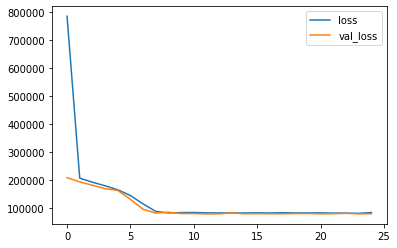

In [ ]:
pd.DataFrame(history_7.history).plot()

### 8th Model - Callbacks (Early Stopping)

Copy Model 7

Add an Early Stopping Callback

All other parameters remain the same

In [ ]:
model_8 = clone_model(model_7)

model_8.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mae'
)

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='min',
)


history_8 = model_8.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=250,
    callbacks=[es]
)

Epoch 1/250
110/110 [==============================] - 2s 9ms/step - loss: 762049.4375 - val_loss: 214284.9688
Epoch 2/250
110/110 [==============================] - 1s 6ms/step - loss: 207232.5781 - val_loss: 193598.2344
Epoch 3/250
110/110 [==============================] - 1s 6ms/step - loss: 191455.1719 - val_loss: 179240.2344
Epoch 4/250
110/110 [==============================] - 1s 6ms/step - loss: 176297.7031 - val_loss: 163322.4688
Epoch 5/250
110/110 [==============================] - 1s 6ms/step - loss: 156424.4844 - val_loss: 143818.7344
Epoch 6/250
110/110 [==============================] - 1s 6ms/step - loss: 129206.3047 - val_loss: 110257.8750
Epoch 7/250
110/110 [==============================] - 1s 6ms/step - loss: 96880.6328 - val_loss: 88133.8906
Epoch 8/250
110/110 [==============================] - 1s 13ms/step - loss: 86697.1328 - val_loss: 82382.9844
Epoch 9/250
110/110 [==============================] - 1s 6ms/step - loss: 86988.2031 - val_loss: 80713.6328
Epoch 

In [ ]:
model_8.evaluate(X_test, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 81996.5469


81996.546875

In [ ]:
prediction_8 = model_8.predict(X_test)

In [ ]:
mean_absolute_error(y_test, prediction_8)

81996.55016260318

In [ ]:
df['Price'].mean()

1232072.654142357

### Predictions

Compare the evaluation results with the y_test/predictions with *mean_absolute_error*

Create a dataset from the 0th element in the original dataframe and run a prediction on it

How does it compare to the real price?

In [ ]:
df.loc[0]

Avg. Area Income                                                     79545.458574
Avg. Area House Age                                                      5.682861
Avg. Area Number of Rooms                                                7.009188
Avg. Area Number of Bedrooms                                                 4.09
Area Population                                                      23086.800503
Price                                                               1059033.55787
Address                         208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
Name: 0, dtype: object

In [ ]:
test_data = df.loc[0].drop(['Price', 'Address']).values.reshape(-1,5)

In [ ]:
test_data

array([[79545.45857431678, 5.682861321615587, 7.009188142792237, 4.09,
        23086.800502686456]], dtype=object)

In [ ]:
test_data = scaler.transform(test_data)

In [ ]:
test_data

array([[0.68682217, 0.43882367, 0.53564538, 0.46444444, 0.33008323]])

In [ ]:
model_8.predict(test_data)

array([[1240195.1]], dtype=float32)